In [1]:
import pandas as pd
import glob, os, re
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import matplotlib.dates as mdates
from matplotlib import cm, ticker
from scipy.signal import savgol_filter
import calendar
import warnings
warnings.filterwarnings('ignore')


In [2]:
place = 'Keelung'
rainpath = '../DataBase/Data_CWA/rainfall_related/466940-2024-Precipitation-month.csv'
raintimepath = '../DataBase/Data_CWA/rainfall_related/466940-2024-PrecipitationDuration-month.csv'

df = pd.read_csv(rainpath)
df_time = pd.read_csv(raintimepath)

In [3]:
heavy_rain_time = []
superheavy_rain_time = []
for daypath in sorted(glob.glob('../DataBase/Data_CWA/rainfall_related/466940-*-Precipitation-day.csv')):
    print(daypath)
    year = re.split('[|_|-]', daypath)[-3]
    df_ = pd.read_csv(daypath)
    df_array = df_.to_numpy()
    df_array = df_array[:-1,1:]
    df_ = pd.DataFrame(df_array, columns=['1','2','3','4','5','6','7','8','9','10','11','12'])
    for mm in range(1,13):
        tempdf = df_[str(mm)]
        for j, num in enumerate(tempdf):
            if num != 'T' and num != '--':
                num = float(num)
                if num >=70:
                    heavy_rain_time.append(datetime(int(year), mm, j+1))

../DataBase/Data_CWA/rainfall_related/466940-2021-Precipitation-day.csv
../DataBase/Data_CWA/rainfall_related/466940-2022-Precipitation-day.csv
../DataBase/Data_CWA/rainfall_related/466940-2023-Precipitation-day.csv


In [4]:
heavy_rain_time

[datetime.datetime(2021, 1, 4, 0, 0),
 datetime.datetime(2021, 6, 4, 0, 0),
 datetime.datetime(2021, 6, 22, 0, 0),
 datetime.datetime(2021, 7, 24, 0, 0),
 datetime.datetime(2021, 9, 12, 0, 0),
 datetime.datetime(2021, 10, 11, 0, 0),
 datetime.datetime(2021, 10, 12, 0, 0),
 datetime.datetime(2021, 10, 24, 0, 0),
 datetime.datetime(2021, 11, 26, 0, 0),
 datetime.datetime(2022, 1, 17, 0, 0),
 datetime.datetime(2022, 2, 3, 0, 0),
 datetime.datetime(2022, 2, 17, 0, 0),
 datetime.datetime(2022, 2, 21, 0, 0),
 datetime.datetime(2022, 2, 22, 0, 0),
 datetime.datetime(2022, 3, 28, 0, 0),
 datetime.datetime(2022, 5, 16, 0, 0),
 datetime.datetime(2022, 5, 25, 0, 0),
 datetime.datetime(2022, 5, 26, 0, 0),
 datetime.datetime(2022, 9, 4, 0, 0),
 datetime.datetime(2022, 10, 7, 0, 0),
 datetime.datetime(2022, 10, 16, 0, 0),
 datetime.datetime(2022, 10, 17, 0, 0),
 datetime.datetime(2022, 10, 31, 0, 0),
 datetime.datetime(2022, 11, 16, 0, 0),
 datetime.datetime(2022, 11, 24, 0, 0),
 datetime.datetime(2

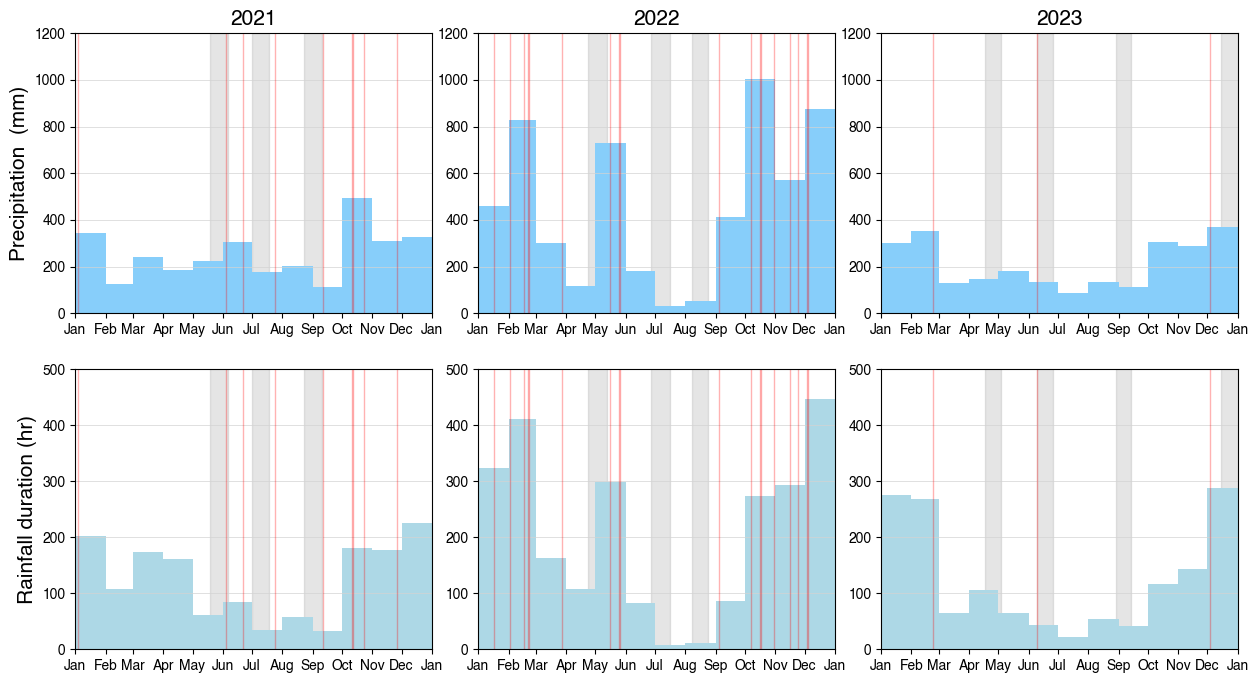

In [6]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
plt.rcParams["font.family"] =  "Helvetica"  
plt.subplots_adjust(wspace = 0.13) 

dp = pd.read_csv('../DataBase/Experiment_period.txt')
dp = dp[dp['region']==place]



for i, year in enumerate([2021,2022,2023]):
    dp_ = dp[dp['year']==year]
    tempdf = df[df['年/月']==str(year)]
    rainlist = []
    datetimelist = []
    widthlist = []
    for mm in range(1,13):
        rainlist.append(float(tempdf[str(mm)].values[0]))
        datetimelist.append(datetime(year,mm,1))
        endday = calendar.monthrange(year, mm)[1]
        widthlist.append(timedelta(days=endday))
    for j in range(len(dp_)):
        begin = pd.to_datetime(dp_['begin'].values[j])
        end = pd.to_datetime(dp_['end'].values[j])
        ax[0,i].fill_betweenx(y=[0, 1200], x1=begin, x2=end, color='grey', alpha=0.2)
        ax[1,i].fill_betweenx(y=[0, 1200], x1=begin, x2=end, color='grey', alpha=0.2)
        
    ax[0,i].bar(datetimelist, rainlist, color='lightskyblue', width=widthlist, align='edge')
    ax[0,i].set_title(str(year), fontsize=15)
    ax[0,i].set_xlim(datetimelist[0], datetimelist[-1]+timedelta(days=31))
    ax[0,i].set_ylim(0,1200)
    ax[0,i].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[0,i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[0,i].grid(axis='y', lw=0.5, color='lightgray', )
for i, year in enumerate([2021,2022,2023]):
    tempdf = df_time[df_time['年/月']==str(year)]
    rainlist = []
    datetimelist = []
    widthlist = []
    for mm in range(1,13):
        rainlist.append(float(tempdf[str(mm)].values[0]))
        datetimelist.append(datetime(year,mm,1))
        endday = calendar.monthrange(year, mm)[1]
        widthlist.append(timedelta(days=endday))
    ax[1,i].bar(datetimelist, rainlist, color='lightblue', width=widthlist, align='edge')
    ax[1,i].set_xlim(datetimelist[0], datetimelist[-1]+timedelta(days=31))
    ax[1,i].set_ylim(0,500)
    ax[1,i].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[1,i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[1,i].grid(axis='y', lw=0.5, color='lightgray', )
ax[1,0].set_ylabel('Rainfall duration (hr)', fontsize=15)
ax[0,0].set_ylabel('Precipitation  (mm)', fontsize=15)

for t in heavy_rain_time:
    year = t.year
    i = year-2021
    ax[0,i].vlines(x=t, ymin=0, ymax=1200, lw=1, color='r', alpha=0.3 )
    ax[1,i].vlines(x=t, ymin=0, ymax=500,  lw=1, color='r', alpha=0.3 )



In [1]:
fig, ax = plt.subplots(1, figsize=(10,2))
plt.rcParams["font.family"] =  "Helvetica"  
plt.subplots_adjust(wspace = 0.13) 

rainlist = []
datetimelist = []
widthlist = []
for i, year in enumerate([2021,2022,2023]):
    dp_ = dp[dp['year']==year]
    tempdf = df[df['年/月']==str(year)]

    for mm in range(1,13):
        rainlist.append(float(tempdf[str(mm)].values[0]))
        datetimelist.append(datetime(year,mm,1))
        endday = calendar.monthrange(year, mm)[1]
        widthlist.append(timedelta(days=endday))
    for j in range(len(dp_)):
        begin = pd.to_datetime(dp_['begin'].values[j])
        end = pd.to_datetime(dp_['end'].values[j])
        ax.fill_betweenx(y=[0, 1200], x1=begin, x2=end, color='grey', alpha=0.3)
for t in heavy_rain_time:
    year = t.year
    i = year-2021
    ax.vlines(x=t, ymin=0, ymax=1200, lw=0.75, color='r', alpha=0.2 )
    
ax.bar(datetimelist, rainlist, color='lightskyblue', width=widthlist, align='edge')
ax.set_xlim(datetimelist[0], datetimelist[-1]+timedelta(days=31))
ax.set_ylim(0, 1200)
ax.set_ylabel('Precipitation (mm)', fontsize=12)
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))
ax.grid(axis='y', lw=0.5, color='lightgray', )

plt.savefig('../Results/Detection_snap/relationship/Rainfall_three_years.png', dpi=200, bbox_inches='tight')
plt.savefig('../Results/Detection_snap/relationship/Rainfall_three_years.pdf', dpi=200, bbox_inches='tight')

NameError: name 'plt' is not defined

In [14]:
2543/5568

5651.111111111111

In [17]:
5568*0.45

2505.6

In [18]:
2543*1.45

3687.35